## Problem 6

In [11]:
# Imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis as skda

In [2]:
# Load data
data = []
classes = [[], [], []]
with open('data_3_6.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        data.append([float(row[0]), float(row[1]), float(row[2])]) # Not the BEST way of doing this, but mapping float() did weird things.
        if row[2] == '1':
            classes[0].append(list(map(float, row[0:2])))
        elif row[2] == '2':
            classes[1].append(list(map(float, row[0:2])))
        else:
            classes[2].append(list(map(float, row[0:2])))
            
print("Class 1 length: ", len(classes[0]))
print("Class 2 length: ", len(classes[1]))
print("Class 3 length: ", len(classes[2]))

Class 1 length:  1000
Class 2 length:  500
Class 3 length:  1000


### 6A

Means:  [0.01178362996246658, 4.025505056145721, -1.362255644009889]
Sigmas:  [array([[ 3.15511086, -1.082084  ],
       [-1.082084  ,  2.10518773]]), array([[3.43351747, 0.03114848],
       [0.03114848, 5.75450287]]), array([[10.85896586,  0.10843396],
       [ 0.10843396,  3.12917255]])]


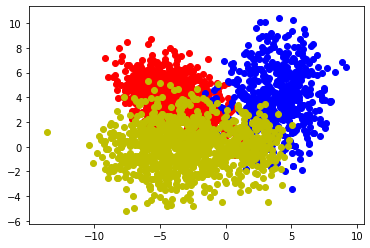

In [9]:
# Visualize data
colors = ['y', 'r', 'b']
idx = 0

# Loop through each class of data and plot in a different color
for c in classes:
    idx = (idx + 1) % 3
    for data in c:
        plt.scatter(data[0], data[1], color=colors[idx])
    
# Determine multivariate normal distribution parameters for each class
means = [[], [], []]
sigmas = [[], [], []]
for i in range(len(classes)):
    means[i] = np.mean(classes[i])
    sigmas[i] = np.cov(np.array(classes[i]).T) # Convert to NP array and transpose

print("Means: ", means)
print("Sigmas: ", sigmas)
    
# Put training data in a form so we can fit LDA, QDA and Bayesian models to it
X = np.array(classes[0] + classes[1] + classes[2])
y = np.array([1 for i in range(len(classes[0]))] + [2 for i in range(len(classes[1]))] + [3 for i in range(len(classes[2]))])

### QDA

QDA predictions in class 1:  1037
QDA predictions in class 2:  508
QDA predictions in class 3:  955


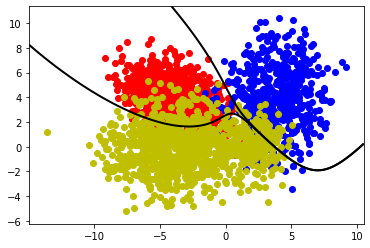

In [12]:
# Visualize data
colors = ['y', 'r', 'b']
idx = 0

# Loop through each class of data and plot in a different color
for c in classes:
    idx = (idx + 1) % 3
    for data in c:
        plt.scatter(data[0], data[1], color=colors[idx])

quadratic = skda.QuadraticDiscriminantAnalysis()
model = quadratic.fit(X, y)
predictions = [0, 0, 0]

# Predict points
for i in range(len(classes)):
    for j in range(len(classes[i])):
        yhat = model.predict([classes[i][j]])[0]
        #print(yhat)
        predictions[yhat - 1]+= 1
        
# Draw QDA boundaries
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Boundary line 1
Z1 = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z1, [0.5], linewidths=2., colors='k')

# Boundary line 2
Z2 = Z[:, 2].reshape(xx.shape)
plt.contour(xx, yy, Z2, [0.5], linewidths=2., colors='k')

print("QDA predictions in class 1: ", predictions[0])
print("QDA predictions in class 2: ", predictions[1])
print("QDA predictions in class 3: ", predictions[2])

### LDA

LDA predictions in class 1:  1045
LDA predictions in class 2:  508
LDA predictions in class 3:  947


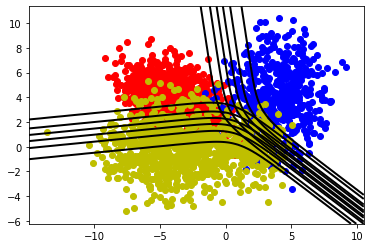

In [15]:
# Visualize data
colors = ['y', 'r', 'b']
idx = 0

# Loop through each class of data and plot in a different color
for c in classes:
    idx = (idx + 1) % 3
    for data in c:
        plt.scatter(data[0], data[1], color=colors[idx])

linear = skda.LinearDiscriminantAnalysis()
model = linear.fit(X, y)
predictions = [0, 0, 0]

# Predict points
for i in range(len(classes)):
    for j in range(len(classes[i])):
        yhat = model.predict([classes[i][j]])[0]
        #print(yhat)
        predictions[yhat - 1]+= 1
        
# Draw LDA boundaries
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Boundary line 1
Z1 = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z1, [0.5], linewidths=2., colors='k')

# Boundary line 2
Z2 = Z[:, 2].reshape(xx.shape)
plt.contour(xx, yy, Z2, [0.5], linewidths=2., colors='k')

print("LDA predictions in class 1: ", predictions[0])
print("LDA predictions in class 2: ", predictions[1])
print("LDA predictions in class 3: ", predictions[2])

### Discussion
These data are in 3 distinct classes. We can build 3 different classifiers (Naive Bayes, LDA and QDA). !!! Add more here after figuring out the distributions and classifiers.